<a href="https://colab.research.google.com/github/Khang2561/predict_number_by_img-/blob/main/predict_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Mục 1: Load dữ liệu
-> MNIST là viết tắt của Modified National Institute of Standards and Technology

In [ ]:
#import thư viện ảnh
from keras.datasets.mnist import load_data
#tải dữ liệu đã có sẳn và chia thành 2 tập train và test
(X_train, y_train), (X_test, y_test) = load_data()

#Mục 2: Chuẩn bị dữ liệu '
-> Số lượng ảnh của tập train là 60000 và test là 10000, tỷ lệ train/test là 6/1
-> Kích thức của mỗi ảnh trên tập train và test là 28x28 pixel
-> Số nhãn trong tập train và test là 10 gồm 0,1,2,3,4,5,6,7,8,9

Text(0.5, 1.0, '5')

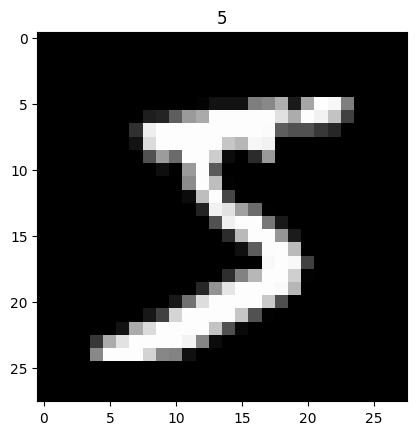

In [ ]:
plt.imshow(X_train[0],cmap = 'gray')#hiển thị ảnh trắng đen đầu tiên của tập X_train
plt.title(y_train[0])#hiển thị giá trị đầu tiên của biến y_train

Text(0.5, 1.0, '7')

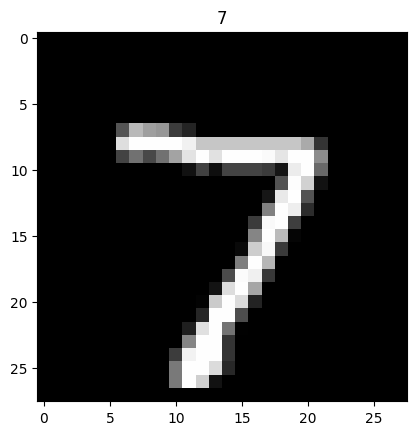

In [ ]:
plt.imshow(X_test[0],cmap = 'gray')#hiển thị ảnh trắng đen đầu tiên của tập X_test
plt.title(y_test[0])#HHiển thị nhãn đầu tiên của tập y_test

In [ ]:
X_train.shape#xuất ra hình dáng của tập dữ liệu X_train

(60000, 28, 28)

In [ ]:
X_train[0].shape#xuất ra hình diến của ảnh đầu tiên

(28, 28)

In [ ]:
X_test.shape#xuất ra hình dạng của tập dữ liệu X_Test

(10000, 28, 28)

In [ ]:
X_test[0].shape#xuất ra hình diến của ảnh đầu tiên

(28, 28)

In [ ]:
y_train.shape#số lượng nhãn có trong tập y_train

(60000,)

In [ ]:
y_test.shape#số lượng nhãn có trong tập y_test

(10000,)

In [ ]:
#xuất ra số lượng mỗi nhãn có trong tập y_train
label_list = dict()

for i in range(0,10):
  label_list[i] = list(y_train).count(i)

In [ ]:
label_list

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

Text(0.5, 0, 'Nhãn')

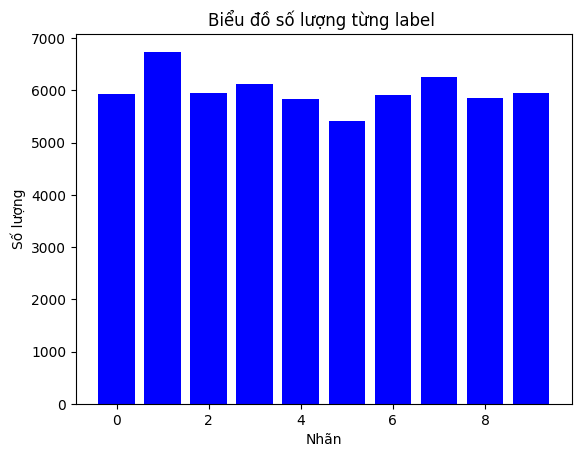

In [ ]:
#vẽ biểu đồ cột các nhãn có trong tập y_train
plt.bar(label_list.keys(),label_list.values(),color='blue')
plt.title("Biểu đồ số lượng từng label ")
plt.ylabel("Số lượng")
plt.xlabel("Nhãn")

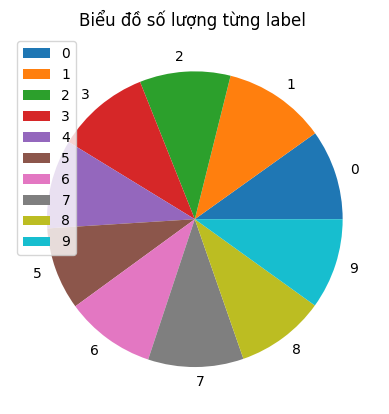

In [ ]:
#vẻ biểu đồ hình tròn các nhãn có trong tập y_trian
plt.pie(labels=label_list.keys(),x=label_list.values())
plt.title("Biểu đồ số lượng từng label ")
plt.legend(ncol=1);

In [ ]:
#biến đổi kích thức của dữ liệu để đưa vào model
X_train_reshaped = X_train.reshape(-1, 784)
X_train_reshaped.shape

(60000, 784)

In [ ]:
#biến đổi kích thức của dữ liệu để đưa vào model
X_test_reshaped = X_test.reshape(-1, 784)
X_test_reshaped.shape

(10000, 784)

-> mỗi điểm dữ liệu có số chiều là 794,1, các số -1 và 784 nghĩa là hình ảnh đã được kéo dãng thành ma trận 1 chiều

In [ ]:
# biến mỗi nhãn thành một ma trận 1 chiều với 10 phần tử, nếu nhã thuộc phần tử nào thì số 1 của nhãn đó sẻ được bật lên
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#3. Xây dựng mạng neural bắng keras

In [ ]:
#chuỗi các layer
from keras.models import Sequential
model = Sequential()


In [ ]:
# thêm layer vào model
from keras.layers import Dense
Dense(784, input_shape=(784, ))#784 vì đầu vô là ma trận 1 chiều vói 784 giá trị
model.add(Dense(784, input_shape=(784, )))
model.add(Dense(10, input_shape=(784, )))#10 vì đầu ra là một ma trận với 10 giá trị
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 784)               615440    
                                                                 
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#output là một ma trận 1 chiều vói 10 giá trị
model.output.shape

TensorShape([None, 10])

#4. Huấn luyện mô hình

In [ ]:
#tối ưu hàm loss
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
loss = BinaryCrossentropy()

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
model.fit(X_train_reshaped, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 3.2007 - accuracy: 0.0977
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 2.7679 - accuracy: 0.0975
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 2.7679 - accuracy: 0.0975
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 2.7679 - accuracy: 0.0975
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 2.7679 - accuracy: 0.0975
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 2.7679 - accuracy: 0.0975
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 2.7679 - accuracy: 0.0975
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 2.7679 - accuracy: 0.0975
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 2.7679 - accuracy: 0.0975
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 2.7679 - accuracy: 0.0975

#5 Đánh giá mô hình

In [ ]:
y_pred = model.predict(X_test_reshaped)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred_label = np.argmax(y_pred, axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_label)*100

9.74

#6. Lưu mô hình

In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#7. Một số thao tác xử lý khác với mạng neural

In [ ]:
from keras.models import load_model
model = load_model('my_model.h5')


In [ ]:
model.layers

In [ ]:
model.layers[0]



In [ ]:
model.get_layer(index=0)

In [ ]:
model.weights



[<tf.Variable 'dense_7/kernel:0' shape=(784, 784) dtype=float32, numpy=
 array([[-0.03630842,  0.02805961, -0.05655671, ...,  0.00701023,
          0.00583774,  0.00144808],
        [ 0.03079486,  0.00314303,  0.03475754, ...,  0.03862151,
          0.02571757,  0.04928209],
        [-0.01102953,  0.01988769, -0.017155  , ..., -0.04235791,
          0.0239479 ,  0.0559344 ],
        ...,
        [ 0.06056637, -0.039672  , -0.00432141, ...,  0.05055519,
          0.00174964,  0.0314504 ],
        [-0.00692174, -0.05808692,  0.01707523, ..., -0.02121172,
          0.02736734,  0.0148134 ],
        [-0.02539682,  0.01658586,  0.0458043 , ..., -0.01561895,
          0.03489086,  0.00765968]], dtype=float32)>,
 <tf.Variable 'dense_7/bias:0' shape=(784,) dtype=float32, numpy=
 array([ 0.11158859,  0.1302935 , -0.06409152,  0.09572286, -0.14829658,
         0.15071976,  0.01317546, -0.15106156, -0.07973759, -0.1299477 ,
         0.04737985,  0.13587956, -0.10813607,  0.0512757 ,  0.09380275,


In [ ]:
model.get_weights()

[array([[-0.03630842,  0.02805961, -0.05655671, ...,  0.00701023,
          0.00583774,  0.00144808],
        [ 0.03079486,  0.00314303,  0.03475754, ...,  0.03862151,
          0.02571757,  0.04928209],
        [-0.01102953,  0.01988769, -0.017155  , ..., -0.04235791,
          0.0239479 ,  0.0559344 ],
        ...,
        [ 0.06056637, -0.039672  , -0.00432141, ...,  0.05055519,
          0.00174964,  0.0314504 ],
        [-0.00692174, -0.05808692,  0.01707523, ..., -0.02121172,
          0.02736734,  0.0148134 ],
        [-0.02539682,  0.01658586,  0.0458043 , ..., -0.01561895,
          0.03489086,  0.00765968]], dtype=float32),
 array([ 0.11158859,  0.1302935 , -0.06409152,  0.09572286, -0.14829658,
         0.15071976,  0.01317546, -0.15106156, -0.07973759, -0.1299477 ,
         0.04737985,  0.13587956, -0.10813607,  0.0512757 ,  0.09380275,
         0.01770008, -0.05638011,  0.15479335,  0.06951502, -0.1326576 ,
        -0.1258037 ,  0.01695854, -0.05789348, -0.12232968, -0.107

In [ ]:
model.layers[0].weights
model.layers[0].get_weights()

[array([[-0.03630842,  0.02805961, -0.05655671, ...,  0.00701023,
          0.00583774,  0.00144808],
        [ 0.03079486,  0.00314303,  0.03475754, ...,  0.03862151,
          0.02571757,  0.04928209],
        [-0.01102953,  0.01988769, -0.017155  , ..., -0.04235791,
          0.0239479 ,  0.0559344 ],
        ...,
        [ 0.06056637, -0.039672  , -0.00432141, ...,  0.05055519,
          0.00174964,  0.0314504 ],
        [-0.00692174, -0.05808692,  0.01707523, ..., -0.02121172,
          0.02736734,  0.0148134 ],
        [-0.02539682,  0.01658586,  0.0458043 , ..., -0.01561895,
          0.03489086,  0.00765968]], dtype=float32),
 array([ 0.11158859,  0.1302935 , -0.06409152,  0.09572286, -0.14829658,
         0.15071976,  0.01317546, -0.15106156, -0.07973759, -0.1299477 ,
         0.04737985,  0.13587956, -0.10813607,  0.0512757 ,  0.09380275,
         0.01770008, -0.05638011,  0.15479335,  0.06951502, -0.1326576 ,
        -0.1258037 ,  0.01695854, -0.05789348, -0.12232968, -0.107

In [ ]:
model.pop()


In [ ]:
del model


In [ ]:
model_BT2 = Sequential()
from keras.layers import Dense
model_BT2.add(Dense(784, input_shape=(784, ),activation='relu'))
model_BT2.add(Dense(10, input_shape=(784, ),activation='sigmoid'))
model_BT2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 784)               615440    
                                                                 
 dense_13 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#chuẩn hóa thang mau tu 255 thanh 0 toi 1
X_train_new = X_train/255.0
X_test_new = X_test/255.0


In [ ]:
X_train_new_reshape = X_train_new.reshape(-1,784)
X_test_new_reshape = X_test_new.reshape(-1,784)

In [ ]:
optimizer = Adam(learning_rate=0.025)

In [ ]:
model_BT2.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

In [ ]:
model_BT2.fit(X_train_new_reshape, y_train, batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 5s 4ms/step - loss: 0.0561 - accuracy: 0.9303
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0258 - accuracy: 0.9650
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0232 - accuracy: 0.9696
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0208 - accuracy: 0.9741
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0204 - accuracy: 0.9755
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0179 - accuracy: 0.9784
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0188 - accuracy: 0.9777
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0173 - accuracy: 0.9802
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0168 - accuracy: 0.9813
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0166 - accuracy: 0.9809

In [ ]:
y_pred_new = model_BT2.predict(X_test_new_reshape)
y_pred_new_label =  np.argmax(y_pred_new, axis=-1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_new_label)*100

96.17

0.9614286430498735

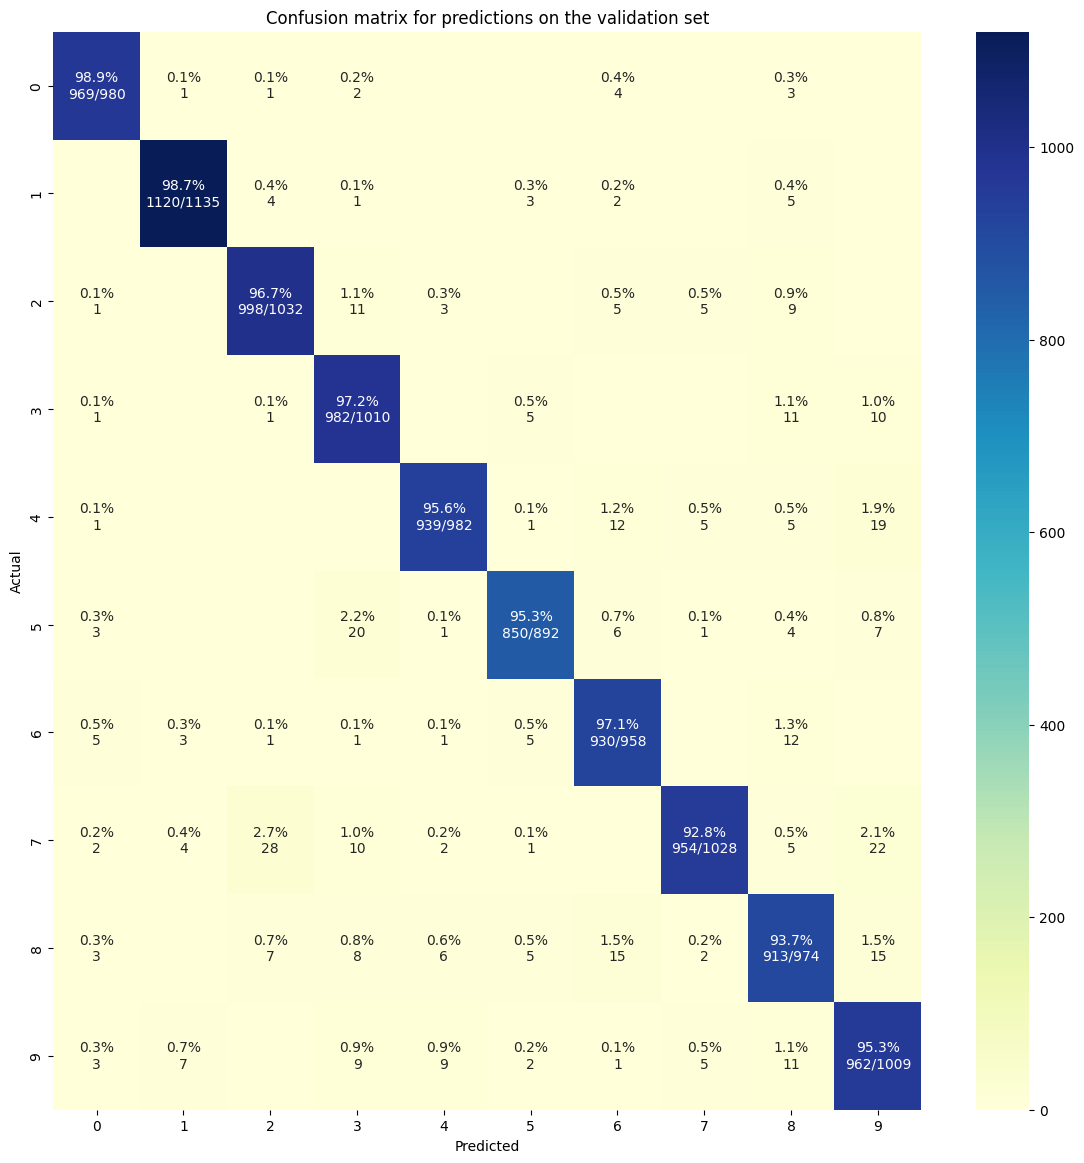

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

plot_cm(y_test,y_pred_new_label, 'Confusion matrix for predictions on the validation set')
f1_score(y_test,y_pred_new_label, average = 'macro')